In [5]:
#import chart_studio.plotly as py
#import plotly.graph_objs as go
#from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy
from scipy import stats
from statistics import *

import matplotlib.pyplot as plt

## Importando dados

In [6]:
#Consumo de álcool nos países
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2010_alcohol_consumption_by_country.csv')
df = data[0:10]

df
print( df['alcohol'])
print( df['alcohol'].size)



0    17.5
1    16.8
2    15.4
3    15.1
4    14.4
5    13.9
6    13.8
7    13.3
8    13.0
9    13.0
Name: alcohol, dtype: float64
10


In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/advinstai/python-datascience/master/csv/College.csv')
print(data)
print(data.describe())
print(data.info())

                         Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad

In [8]:
df['alcohol'].value_counts(bins=10)

tot_classes=1+3.3*np.log( df['alcohol'].size)
print(tot_classes)

print(df['alcohol'].value_counts(bins=tot_classes))

amplitude=((df['alcohol'].max()-df['alcohol'].min())/tot_classes)
print(amplitude)

8.598530806880351
(12.995000000000001, 13.562]    3
(13.562, 14.125]                2
(16.938, 17.5]                  1
(16.375, 16.938]                1
(15.25, 15.812]                 1
(14.688, 15.25]                 1
(14.125, 14.688]                1
(15.812, 16.375]                0
Name: alcohol, dtype: int64
0.5233452203717408


## Amplitude
A amplitude nada mais é do que a diferença entre o maior e o menor valor de um conjunto de dados. Para isso, pode-se usar as funções `max()` e `min()`, que retornam o valor máximo e mínimo de um conjunto de dados, e depois subtrairemos um do outro:

In [10]:
amplitude = df['alcohol'].max() - df['alcohol'].min()
print('A amplitude do intervalo é: ', amplitude)

A amplitude do intervalo é:  4.5


## Histograma

histograma, também conhecido como distribuição de frequências, é a representação gráfica em colunas ou em barras (retângulos) de um conjunto de dados previamente tabulado e dividido em classes uniformes ou não uniformes. A base de cada retângulo representa uma classe. A altura de cada retângulo representa a quantidade ou a frequência absoluta com que o valor da classe ocorre no conjunto de dados para classes uniformes ou a densidade de frequência para classes não uniformes. [\[fonte\]](https://books.google.com.br/books?id=-FlCFbIluaQC&printsec=frontcover&hl=pt-BR#v=onepage&q&f=false)

In [ ]:
import plotly.express as px

#passamos o dataframe e a coluna Alcohol como valores do eixo x
fig = px.histogram(data, x="alcohol") #, nbins=8)
print(type(fig))
fig.show()


#passamos o dataframe e a coluna Alcohol como valores do eixo x
fig = px.histogram(colldata, x="Apps") #, nbins=8)
print(type(fig))
fig.show()

fig = px.bar(colldata, x='Private')
fig.show()

# Média e variância

Duas das operações estatísticas mais básicas são a média µ e o desvio padrão σ de uma matriz de dados unidimensional, ou seja, uma sequência de valores numéricos. A média de um conjunto de números $ x_1, ..., x_N $ é definida como:

$ \mu = (\sum_{i=1}^N x_i) /n $

Variância é uma métrica que descreve a dispersão dos dados ou a que distância os valores estão da média.

$ s =  \frac{1}{N-1} \sum_{i=1}^N (x_i - \mu)^2 $


[\[fonte\]](https://plot.ly/python/v3/basic-statistics/)

In [ ]:
print(data['alcohol'])
media = np.mean(data['alcohol'])
print(media)
print(np.var(data['alcohol']))


# Desvio Padrão

O desvio padrão de um conjunto de dados é definido como a raiz da Variância:

$ s = \sqrt{ \frac{1}{N-1} \sum_{i=1}^N (x_i - \mu)^2} $


[\[fonte\]](https://plot.ly/python/v3/basic-statistics/)

In [ ]:
print(df['alcohol'])
media = np.mean(data['alcohol'])
st_dev = np.std(data['alcohol'])

print("A média é: ", media)
print("O desvio_padrão é:  ", st_dev)


## Mediana 

Mediana é o valor que separa a metade maior e a metade menor de uma amostra, uma população ou uma distribuição de probabilidade. Em termos mais simples, mediana pode ser o valor do meio de um conjunto de dados. No conjunto de dados {1, 3, 3, 6, 7, 8, 9}, por exemplo, a mediana é 6. Se houver um número par de observações, não há um único valor do meio. Então, a mediana é definida como a média dos dois valores do meio. No conjunto de dados {3, 5, 7, 9}, a mediana é:

$ {\displaystyle {\frac {5+7}{2}}=6}$. 

[\[fonte\]](http://mathworld.wolfram.com/StatisticalMedian.html)

In [ ]:
intervalo = [1, 3, 3, 6, 7, 8, 9,10,11,15,1200,1500]
mediana_intervalo = np.median(intervalo)
print("A mediana do intervalo é:", mediana_intervalo)


mediana_dataset = np.median(data['alcohol'])
print("A mediana do dataset é: ", mediana_dataset)

## Quantil

O quantil pode ser entendido como uma generalização da mediana. O quantil é o valor abaixo do qual está um certo percentual dos dados. No caso da mediana, esse percentual é de 50%. Vejamos o código para o quantil, que pode ser calculado através da função quantile(). Esta função, por padrão, adota o percentual (representado através do parâmetro q) de 50%, ou seja, é uma mediana por padrão. Você pode configurar outros percentuais através deste mesmo parâmetro:

In [ ]:
# Equivalente ao primeiro quartil
# Ou seja: divede a distribuição em 25% abaixo e 75% acima
primeiro_quartil = data['alcohol'].quantile(q = 0.25)

# Equivalente ao quarto decil
# Ou seja: divide a distribuição em 40% abaixo e 60% acima
quarto_decil = data['alcohol'].quantile(q = 0.4)

print("O valor referente ao  primeiro quartil é: ", primeiro_quartil)
print("O valor referente ao  quarto decil é: ", quarto_decil)

In [ ]:
# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(10) * 50
flier_high = np.ones(1) * 50 #np.random.rand(10) * 100 + 100
#flier_low =  np.ones(1) * 50 #np.random.rand(5) * 100 + 100 #
flier_low = np.random.rand(5) * -100 #np.ones(1) * 50 #np.random.rand(5) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data['alcohol'])

## Moda

Em estatística, moda é uma das medidas de altura de um conjunto de dados, assim como a média e a mediana. Ela pode ser definida em moda amostral e populacional.

Em relação à primeira delas, a moda amostral de um conjunto de dados trata do valor que ocorre com maior frequência ou o valor mais comum em um conjunto de dados. Moda é especialmente útil quando os valores ou as observações não são numéricos, casos em que a média e a mediana não podem ser definidas. Por exemplo, a moda da amostra \[maçã, banana, laranja, laranja, laranja, pêssego\] é laranja. Moda amostral não é necessariamente única como média ou mediana. Amostras que possuem uma moda são chamadas unimodais. Por exemplo, a amostra \[1, 2, 3, 5, 5, 6, 7\] tem moda 5. Amostras que possuem duas modas são chamadas bimodais. Por exemplo, a amostra \[1, 2, 3, 5, 5, 6, 6\] tem modas 5 e 6. Amostras que possuem várias modas são chamadas multimodais. Por exemplo, a amostra \[1, 2, 3, 5, 5, 6, 6, 7, 7\] tem modas 5, 6 e 7. Amostras que não possuem moda são chamadas amodais. Por exemplo, a amostra \[1, 3, 2, 5, 7, 6\] não tem moda.
[\[fonte\]](http://www.pucrs.br/edipucrs/erematsul/minicursos/modaestatistica.pdf)


In [13]:
intervalo = [1, 2, 3, 5, 4, 15, 7,8,19,119,1119,121,131,411]
moda = stats.mode(intervalo)

print('A moda do intervalo é: ', moda)

A moda do intervalo é:  ModeResult(mode=array([1]), count=array([1]))


## Gráfico de dispersão

Os diagramas de dispersão ou gráficos de dispersão são representações de dados de duas (tipicamente) ou mais variáveis que são organizadas em um gráfico. O gráfico de dispersão utiliza coordenadas cartesianas para exibir valores de um conjunto de dados. Os dados são exibidos como uma coleção de pontos, cada um com o valor de uma variável determinando a posição no eixo horizontal e o valor da outra variável determinando a posição no eixo vertical (em caso de duas variáveis).[\[fonte\]](https://www.itl.nist.gov/div898/handbook/eda/section3/scatterp.htm)

In [ ]:
#test = data.sample(frac=1)



fig = px.scatter(data, x='alcohol')

fig.show()


## Distribuição normal

A distribuição Normal é uma das mais importantes distribuições de probabilidade pois muitos fenômenos aleatórios comportam-se próximos a essa distribuição:
* altura;
* pressão sangüínea;
* Peso

Pode ser utilizada para calcular, de forma aproximada, probabilidades para outras distribuições, como por exemplo, para a distribuição binomial [\[fonte\]](https://www.ime.usp.br/~hbolfar/aula_2013/Aula6-A12012.pdf)

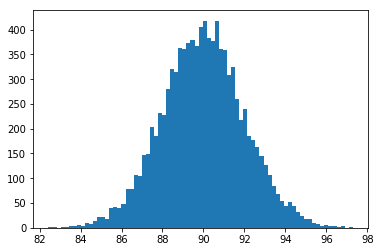

In [11]:


values= np.random.normal(90,2, 10000)
plt.hist(values,75)
plt.show()


In [2]:
climatedata = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/subplots.csv')
#print(climatedata.describe())
print(climatedata.info())

NameError: name 'pd' is not defined

In [ ]:
#fig = px.scatter(climatedata, x='mauna loa co2', y='south pole co2')
fig = px.scatter(climatedata, x='south pole co2', y='+2σ temperature anomaly')

fig.show()

In [ ]:
colldata = pd.read_csv('https://raw.githubusercontent.com/advinstai/python-datascience/master/csv/College.csv')
print(colldata.info())
print(colldata.describe())
print(colldata.corr())

fig = px.scatter(colldata, x='Accept', y='Apps')
fig.show()

fig = px.scatter(colldata, x='Enroll', y='Expend')
fig.show()

fig = px.scatter(colldata, x='Room.Board', y='S.F.Ratio')
fig.show()

fig = px.scatter(colldata, x='Outstate', y='Enroll')
fig.show()




In [ ]:


print(climatedata.corr(method ='pearson'))
print(climatedata.corr(method ='spearman'))
print(climatedata.corr(method ='kendall'))


In [ ]:
print(climatedata.describe())
print(climatedata.corr())

fig = px.scatter(data, x='heat content')
fig.show()

In [ ]:
# Titanic

In [ ]:
import plotly.express as px
titanicdata = pd.read_csv('https://raw.githubusercontent.com/advinstai/python-datascience/master/Exercicios/titanic/train.csv')
print(titanicdata.describe())

#histograma da idade
fig = px.histogram(titanicdata, x="Sex")

fig.show()
titanicdataSort=titanicdata.sort_values(by='Age')
#titanicslice = titanicdata[0:10]
fig = px.bar(titanicdataSort, x='Sex', y='Age')

fig.show()

In [ ]:
import plotly.express as px

titanicdata = pd.read_csv('https://raw.githubusercontent.com/advinstai/python-datascience/master/Exercicios/titanic/train.csv')
print(titanicdata.describe())

#histograma da idade
fig = px.histogram(titanicdata, x="Sex")

fig.show()
titanicdataSort=titanicdata.sort_values(by='Age')
#titanicslice = titanicdata[0:10]
fig = px.bar(titanicdataSort, x='Sex', y='Age')

fig.show()

In [ ]:
titanicdata = pd.read_csv('https://raw.githubusercontent.com/advinstai/python-datascience/master/Exercicios/titanic/train.csv')

print(titanicdata.info())
print(titanicdata.describe())
print(titanicdata['Cabin'])

titanicdata['deck'] = titanicdata.Cabin.str.replace('\d+', '')
print(titanicdata['deck'])


In [ ]:
titanicdata = pd.read_csv('https://raw.githubusercontent.com/advinstai/python-datascience/master/Exercicios/titanic/train.csv')
print(titanicdata['Sex'])
print(titanicdata.info())
print(titanicdata.describe())

del titanicdata['Name']
del titanicdata['Ticket']

titanicdata['deck'] = titanicdata.Cabin.str.replace('\d+', '')

categorical_values = ['Sex', 'Embarked', 'Cabin', "deck"]
#print(newtitanicdata['Sex'])
#print(newtitanicdata['Embarked'])
#print(newtitanicdata['Cabin'])

for val in categorical_values:
    titanicdata[val] = newtitanicdata[val].astype('category')
print(titanicdata.info())

print ("cat.codes")
#print (titanicdata['Age'].cat.codes)
print (titanicdata['Sex'].cat)
print (titanicdata['Sex'].cat.codes)
print (type(titanicdata['Sex'].cat.codes))
#print(newtitanicdata.info())
#print(newtitanicdata.describe())

cat_columns = titanicdata.select_dtypes(['category']).columns
print ("cat_columns")
print(cat_columns)
titanicdata[cat_columns] = titanicdata[cat_columns].apply(lambda x: x.cat.codes)

for val in categorical_values:
    titanicdata[val].fillna(titanicdata[val].median(), inplace=True)
    
# Continuous features
for val in ["Age", "Fare", "Pclass", "SibSp"]:
    titanicdata[val].fillna(titanicdata[val].mean(), inplace=True)



print(titanicdata)


#print(newtitanicdata)



In [ ]:
#merge

pop = [1234,5678,91011, 10000]

da = titanicdata[['Embarked']].drop_duplicates().dropna()

da['pop'] = pop

da


In [ ]:
dfmerge = da.merge(titanicdata, on='Embarked')

dfmerge

In [ ]:
def filter_pop(value):
    
    return dfmerge.loc[dfmerge['pop'] <= value]

filter_pop(1300)

In [ ]:
print(titanicdata['Sex'])
m_surv = titanicdata['Survived'].mode()[0]
m_pcla = titanicdata['Pclass'].mode()[0]
m_sex = titanicdata['Sex'].mode()[0]
m_age = titanicdata['Age'].mean()
m_sib = titanicdata['SibSp'].mean()
m_parc = titanicdata['Parch'].mean()
m_fare = titanicdata['Fare'].mean()
m_emba = titanicdata['Embarked'].mode()[0]
m_deck = titanicdata['deck'].mode()[0]

print( m_surv, m_pcla, m_sex, m_age, m_sib, m_parc, m_fare, m_emba, m_deck)

In [ ]:
survivors = titanicdata[titanicdata['Survived'] == 1]
nonsurv = titanicdata[titanicdata['Survived'] == 0]

print(survivors)
print(nonsurv)

print (survivors['Pclass'].mode()[0])
print(survivors['Sex'].mode()[0])
print(survivors['Age'].mean())

print (nonsurv['Pclass'].mode()[0])
print(nonsurv['Sex'].mode()[0])
print(nonsurv['Age'].mean())
#, survivors['SibSp'].mean(),
#survivors['Parch'].mean(), survivors['Fare'].mean(),
#survivors['Embarked'].mode(), survivors['deck'].mode())

#print ( nonsurv['Pclass'].mode(), nonsurv['Sex'].mode(),
#nonsurv['Age'].mean(), nonsurv['SibSp'].mean(),
#nonsurv['Parch'].mean(), nonsurv['Fare'].mean(),
#nonsurv['Embarked'].mode(), nonsurv['deck'].mode())

fig = px.histogram(survivors, x="Sex")

fig.show()

fig = px.histogram(nonsurv, x="Sex")

fig.show()

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
print(type(objects))

y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [ ]:
carseats = pd.read_csv('https://raw.githubusercontent.com/advinstai/python-datascience/master/csv/Carseats.csv')
print(carseats.corr(method='pearson'))
print(carseats.corr(method='kendall'))
   
#fig = px.scatter(carseats, x='Price', y='Sales')
#fig.show()